In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv("soccer_international_history_dataset.csv")
df

,match_date,home_country,away_country,home_score,away_score,match_type,match_city,match_country,home_team_result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,Win
...,...,...,...,...,...,...,...,...,...
38680,2017-11-14,Belgium,Japan,1,0,Friendly,Bruges,Belgium,Win
38681,2017-11-14,Germany,France,2,2,Friendly,Cologne,Germany,Draw
38682,2017-11-14,Trinidad and Tobago,Guyana,1,1,Friendly,Couva,Trinidad and Tobago,Draw
38683,2017-11-15,Australia,Honduras,3,1,FIFA World Cup qualification,Sydney,Australia,Win


In [3]:
homecountry=pd.get_dummies(df.home_country)
awaycountry=pd.get_dummies(df.away_country)
homescore=pd.get_dummies(df.home_score)
awayscore=pd.get_dummies(df.away_score)
matchtype=pd.get_dummies(df.match_type)
matchcountry=pd.get_dummies(df.match_country)

In [5]:
data=df.home_team_result.replace(to_replace="Loss",value=0)
data=data.replace(to_replace="Win",value=1)
data=data.replace(to_replace="Draw",value=2)

In [6]:
df=pd.concat([homecountry,awaycountry,homescore,awayscore,matchtype,matchcountry,data],axis=1)
df

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Yemen,Yemen AR,Yemen DPR,Yugoslavia,Zambia,Zanzibar,Zaïre,Zimbabwe,Éire,home_team_result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
38681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
38682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
38683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
x=df.drop("home_team_result",axis=1)
y=df["home_team_result"]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [13]:
log_reg=LogisticRegression()

In [14]:
log_reg.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# predictions
y_pred=log_reg.predict(x_test)
y_pred

array([2, 1, 0, ..., 0, 2, 1], dtype=int64)

In [22]:
log_reg.score(x_test,y_test)

0.989867659222498

In [32]:
confusion_matrix(y_test,y_pred)

array([[2759,    2,    0],
       [   4, 4650,    0],
       [  32,   60, 2165]], dtype=int64)

In [33]:
accuracy_score(y_test,y_pred)

0.989867659222498

In [34]:
import matplotlib.pyplot as plt

(array([2795.,    0.,    0.,    0.,    0., 4712.,    0.,    0.,    0.,
        2165.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

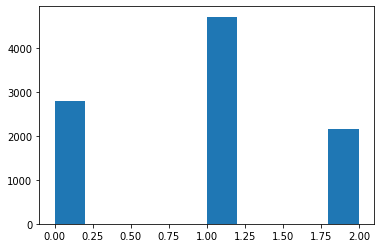

In [35]:
plt.hist(y_pred)